In [1]:
import pandas as pd
df = pd.read_csv("csv/decessi_month.csv")
df.head()

,Data,Totale
0,2015-01-31,5026
1,2015-02-28,4662
2,2015-03-31,4285
3,2015-04-30,3907
4,2015-05-31,3788


In [2]:
df.Data = pd.to_datetime(df.Data)
df.head()

,Data,Totale
0,2015-01-31,5026
1,2015-02-28,4662
2,2015-03-31,4285
3,2015-04-30,3907
4,2015-05-31,3788


In [3]:
df.set_index('Data', inplace=True)
df.head()

,Totale
Data,
2015-01-31,5026
2015-02-28,4662
2015-03-31,4285
2015-04-30,3907
2015-05-31,3788


In [4]:
ts = df.Totale
ts.head()

Data
2015-01-31    5026
2015-02-28    4662
2015-03-31    4285
2015-04-30    3907
2015-05-31    3788
Name: Totale, dtype: int64

In [5]:
from datetime import datetime
from datetime import timedelta
start_date = datetime(2015,1,1)
end_date = datetime(2020,4,1)
lim_ts = ts[start_date:end_date]

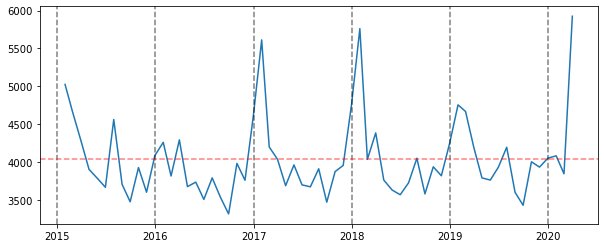

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.axhline(lim_ts.mean(), color='r', alpha=0.5, linestyle='--')

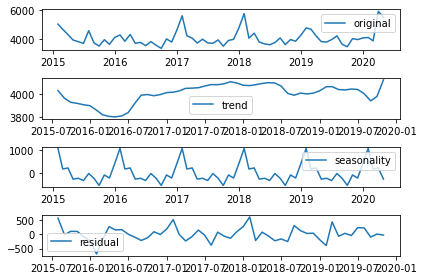

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=12)

ts_trend = decomposition.trend #andamento della curva
ts_seasonal = decomposition.seasonal #stagionalità 
ts_residual = decomposition.resid #parti rimanenti
plt.subplot(411)
plt.plot(ts,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

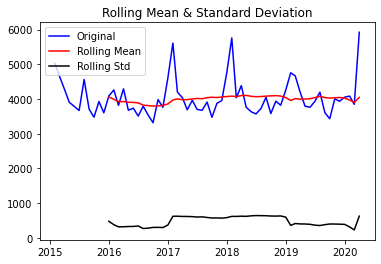

Results of Dickey-Fuller Test:
Test Statistic                 -1.649523
p-value                         0.457289
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64
X is not stationary


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
    else:
        print("X is not stationary")
    
test_stationarity(lim_ts)

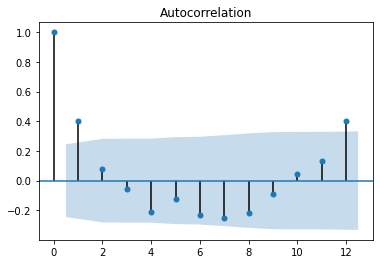

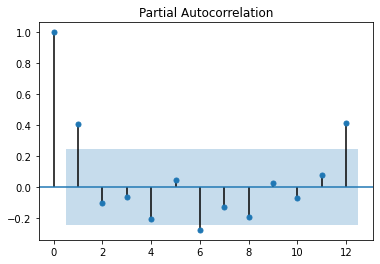

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts, lags =12)
plot_pacf(ts, lags =12)

plt.show()

In [11]:
from datetime import datetime
train_end = datetime (2019,10,31)
test_end = datetime (2019,12,31)

train = ts[:train_end]
test = ts[train_end + timedelta(days=1): test_end]


In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train, order=(12, 0, 6))
model_fit = model.fit(disp=1,solver='powell')
print(model_fit.summary())

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                 Totale   No. Observations:                   58
Model:              SARIMAX(12, 0, 6)   Log Likelihood                -419.888
Date:                Mon, 03 Aug 2020   AIC                            877.776
Time:                        20:47:42   BIC                            916.924
Sample:                    01-31-2015   HQIC                           893.025
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1641      0.207      0.793      0.428      -0.241       0.570
ar.L2          0.0282      0.271      0.104      0.917      -0.502       0.559
ar.L3          0.0193      0.288      0.067      0.9

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


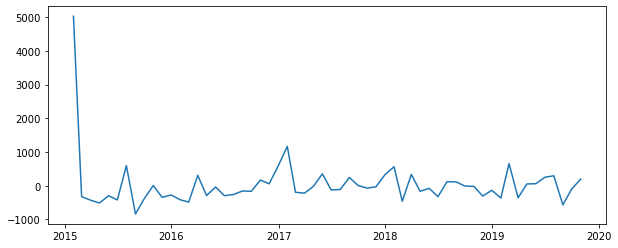

In [96]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.show()

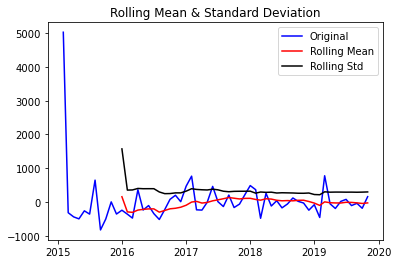

Results of Dickey-Fuller Test:
Test Statistic                -1.745521e+01
p-value                        4.629296e-30
#Lags Used                     0.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
X is stationary


In [97]:
residuals = model_fit.resid
test_stationarity(residuals)

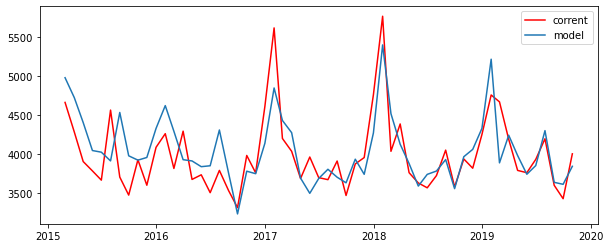

In [125]:
plt.figure(figsize=(10,4))
plt.plot(train.iloc[1:], color='red', label='corrent')
plt.plot(model_fit.fittedvalues.iloc[1:], label='model')
plt.legend()
plt.show()

In [126]:
import numpy as np
from statsmodels.tools.eval_measures import rmse
nrmse = rmse(model_fit.fittedvalues.iloc[1:], train.iloc[1:])/(np.max(train.iloc[1:])-np.min(train.iloc[1:]))
print("RMSE =" , nrmse)

RMSE = 0.13609905378678458


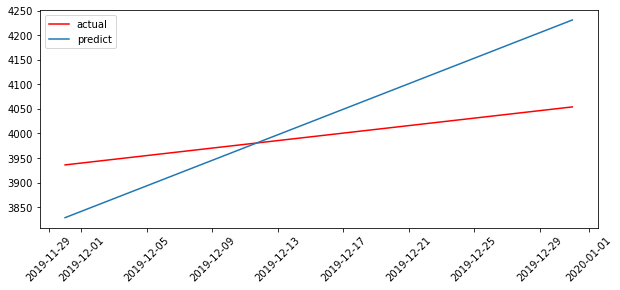

In [127]:
predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(test, label='actual', color='red')
plt.plot(predictions, label='predict')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [128]:
import numpy as np
from statsmodels.tools.eval_measures import rmse
nrmse = rmse(predictions, test)/(np.max(test)-np.min(test))
print("RMSE =" , nrmse)

RMSE = 1.2397317641130872


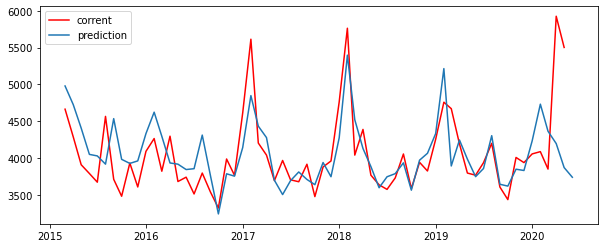

In [129]:
predictions = model_fit.predict(start=0, end=len(ts))
plt.figure(figsize=(10,4))
plt.plot(ts.iloc[1:], color='red', label='corrent')
plt.plot(predictions.iloc[1:], label='prediction')
plt.legend()
plt.show()